LATIHAN 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
df = pd.read_excel("https://docs.google.com/uc?export=download&id=1aBIMc_eKJQIXdboP-ccAC2W0knzK_RWY")
df

,temperatur_udara,kecepatan_angin,klasifikasi_persepsi marry
0,10,0,dingin
1,25,0,panas
2,15,5,dingin
3,20,3,panas
4,18,7,dingin
5,20,10,dingin
6,22,5,panas
7,24,6,panas


ENCODE

In [3]:
encoder = LabelEncoder()
df["klasifikasi_persepsi_encoded"] = encoder.fit_transform(df["klasifikasi_persepsi marry"])

X = df[["temperatur_udara", "kecepatan_angin"]].values
y = df["klasifikasi_persepsi_encoded"].values


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

MENCARI K

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

k_candidates = [1, 3, 5] # Removed 7 to avoid n_neighbors > n_samples_fit error
hasil_k = {}

print("MENGHITUNG K TERBAIK MENGGUNAKAN K-FOLD \n")
for k in k_candidates:
    model = KNeighborsClassifier(n_neighbors=k)
    accuracies = []

    # Jalankan K-Fold
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    avg_acc = np.mean(accuracies)
    hasil_k[k] = avg_acc

    print(f"K = {k} | Akurasi Rata-rata = {avg_acc:.3f}")

MENGHITUNG K TERBAIK MENGGUNAKAN K-FOLD 

K = 1 | Akurasi Rata-rata = 0.900
K = 3 | Akurasi Rata-rata = 0.700
K = 5 | Akurasi Rata-rata = 0.400


In [7]:
k_terbaik = max(hasil_k, key=hasil_k.get)

print(f"\n K TERBAIK = {k_terbaik} (akurasi = {hasil_k[k_terbaik]:.3f})\n")


 K TERBAIK = 1 (akurasi = 0.900)



KKN

In [8]:
model= KNeighborsClassifier(n_neighbors=k_terbaik)
model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=1)

In [9]:
semua_pred = []
semua_asli = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    semua_pred.extend(y_pred)
    semua_asli.extend(y_test)

In [10]:
print("AKURASI TOTAL MODEL (K-FOLD)")
print(f"{accuracy_score(semua_asli, semua_pred):.3f}\n")

print("CLASSIFICATION REPORT")
print(classification_report(semua_asli, semua_pred, target_names=encoder.classes_))



AKURASI TOTAL MODEL (K-FOLD)
0.875

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      dingin       1.00      0.75      0.86         4
       panas       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



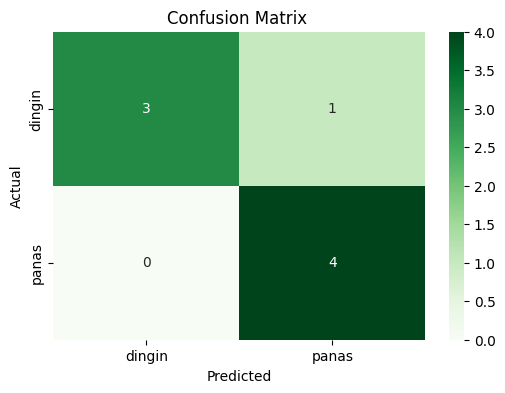

In [11]:
cm = confusion_matrix(semua_asli, semua_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
# contoh data uji latih 1
data_baru = np.array([[16, 3]])

# scaling
data_baru_scaled = scaler.transform(data_baru)

# prediksi
hasil_pred = model.predict(data_baru_scaled)[0]

# ubah ke label asli
hasil_label = encoder.inverse_transform([hasil_pred])[0]

print("HASIL PREDIKSI DATA BARU")
print(f"Temperatur 16°C & Angin 3 km/h dipersepsikan sebagai: {hasil_label}")

HASIL PREDIKSI DATA BARU
Temperatur 16°C & Angin 3 km/h dipersepsikan sebagai: dingin


# LATIHAN 2

In [13]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [14]:
df1 = pd.read_excel("https://docs.google.com/uc?export=download&id=1r5b5XXM7h9qdg8JM1ZQtRld0kgQgy3ZQ")
df1

,nim,hasil_sebenarnya,hasil_prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus
5,TI006,Tidak Lulus,Lulus
6,TI007,Tidak Lulus,Tidak Lulus
7,TI008,Tidak Lulus,Tidak Lulus
8,TI009,Tidak Lulus,Tidak Lulus
9,TI010,Tidak Lulus,Tidak Lulus


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1["Actual_enc"] = encoder.fit_transform(df1["hasil_sebenarnya"])
df1["Pred_enc"] = encoder.transform(df1["hasil_prediksi"])

y_true = df1["Actual_enc"]
y_pred = df1["Pred_enc"]

In [16]:
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

cm_df1 = pd.DataFrame(cm,
                     index=["Actual Lulus", "Actual Tidak Lulus"],
                     columns=["Pred Lulus", "Pred Tidak Lulus"])

print("\nConfusion Matrix:")
display(cm_df1)


Confusion Matrix:


,Pred Lulus,Pred Tidak Lulus
Actual Lulus,3,2
Actual Tidak Lulus,1,4


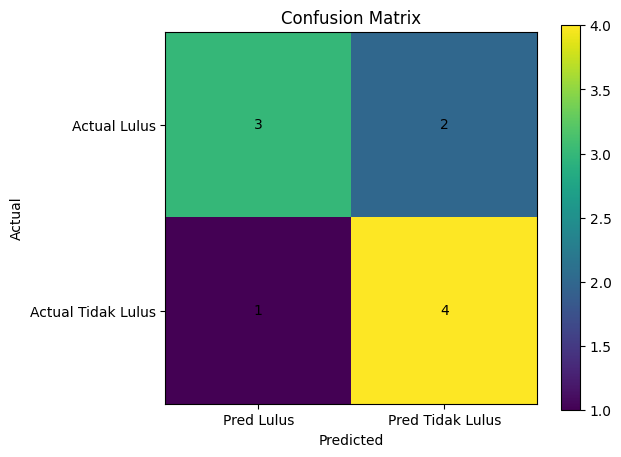

In [17]:
# Visualisasi Confusion Matrix (Heatmap)
plt.figure(figsize=(6,5))
plt.imshow(cm)

# Mengatur label
plt.xticks([0, 1], ["Pred Lulus", "Pred Tidak Lulus"])
plt.yticks([0, 1], ["Actual Lulus", "Actual Tidak Lulus"])

# Menampilkan nilai dalam kotak
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

In [18]:
y_true = df1["Actual_enc"]
y_pred = df1["Pred_enc"]

accuracy = accuracy_score (y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=0)
recall = recall_score(y_true, y_pred, pos_label=0)

print("Akurasi", round (accuracy*100, 2), "% ")
print("Precision", round (precision*100, 2), "% ")
print("Recall", round (recall*100, 2), "% ")

Akurasi 70.0 % 
Precision 75.0 % 
Recall 60.0 % 


# LATIHAN 3

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [26]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bNij11QzV5z1MeT5kyqPMZWkXa7wPnMC')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [28]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [31]:
label_enc = LabelEncoder()
categorical_cols = ["Cloud Cover", "Location", "Season", "Weather Type"]

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

In [32]:
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

In [33]:
X = pd.get_dummies(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred = knn.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       651
           1       0.86      0.88      0.87       647
           2       0.95      0.94      0.94       701
           3       0.94      0.87      0.91       641

    accuracy                           0.89      2640
   macro avg       0.90      0.89      0.89      2640
weighted avg       0.90      0.89      0.90      2640



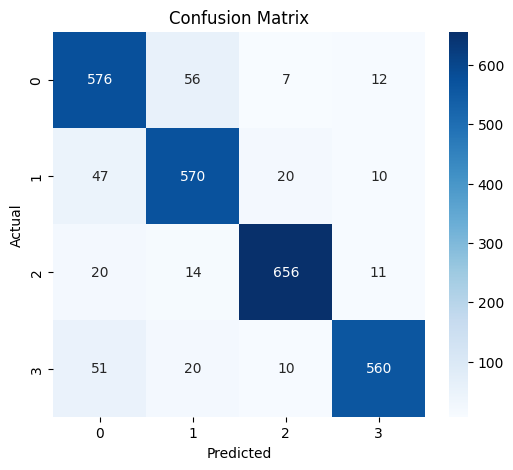

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()